# Дипломная работа

### Признаки:
* 1.satisfaction_level - Уровень удовлетворенности работой
* 2.Last_evaluation - Время с момента последней оценки в годах
* 3.number_projects - Количество проектов, выполненных за время работы
* 4.average_monthly_hours - Среднее количество часов на рабочем месте в месяц
* 5.time_spend_company - Стаж работы в компании в годах
* 6.work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
* 7.left - уволился ли сотрудник
* 8.promotion_last_5years - повышался ли сотрудник за последние пять лет
* 9.department - отдел в котором работает сотрудник
* 10.salary - относительный уровень зарплаты

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Задание 1.
Загрузите файл HR.csv в pandas dataframe

In [2]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


## Задание 2
Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

Среднее, медиану, среднеквадратичное отклонение, минимальное и максимальное значение имеет смысл вычислять для первых 5 признаков

In [4]:
# Среднее
df.iloc[:,0:5].mean()

satisfaction_level        0.612834
last_evaluation           0.716102
number_project            3.803054
average_montly_hours    201.050337
time_spend_company        3.498233
dtype: float64

In [5]:
# Медиана
df.iloc[:,0:5].median()

satisfaction_level        0.64
last_evaluation           0.72
number_project            4.00
average_montly_hours    200.00
time_spend_company        3.00
dtype: float64

In [6]:
# Среднеквадратичное отклонение
df.iloc[:,0:5].std()

satisfaction_level       0.248631
last_evaluation          0.171169
number_project           1.232592
average_montly_hours    49.943099
time_spend_company       1.460136
dtype: float64

In [7]:
# Минимальное значение
df.iloc[:,0:5].min()

satisfaction_level       0.09
last_evaluation          0.36
number_project           2.00
average_montly_hours    96.00
time_spend_company       2.00
dtype: float64

In [8]:
# Максимальное значение
df.iloc[:,0:5].max()

satisfaction_level        1.0
last_evaluation           1.0
number_project            7.0
average_montly_hours    310.0
time_spend_company       10.0
dtype: float64

In [9]:
# Мода
print('Количество проектов, выполненных за время работы:', df.iloc[:,2].mode()[0])
print('Среднее количество часов на рабочем месте в месяц:', df.iloc[:,3].mode()[0])
print('Стаж работы в компании в годах:', df.iloc[:,4].mode()[0])

Количество проектов, выполненных за время работы: 4
Среднее количество часов на рабочем месте в месяц: 135
Стаж работы в компании в годах: 3


## Задание 3
Рассчитайте и визуализировать корреляционную матрицу дляколичественных переменных.Определите две самые скоррелированные и две наименеескоррелированные переменные.

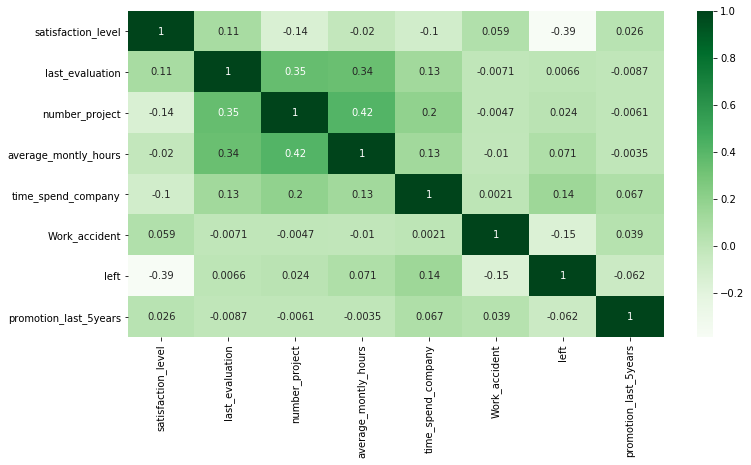

In [10]:
#Тепловая карта коэффициентов корреляции датасета
plt.figure(figsize=(12,6))
p = sns.heatmap(df.corr(), annot=True, cmap='Greens')

Наиболее сильная корреляция наблюдается между:
* количеством выполненных проектов и средним количеством часов на рабочем месте в месяц
* уровнем удовлетворенности и увольнением (обратная корреляция)

Наиболее слабая корреляция между:
* несчастными случаями на работе и временем работы в компании
* средним количеством часов на рабочем месте в месяц и повышением за последние 5 лет (обратная)

## Задание 4
Рассчитайте сколько сотрудников работает в каждомдепартаменте.

In [11]:
# Количество сотрудников в каждом департаменте
df.groupby('department')['salary'].count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: salary, dtype: int64

## Задание 5
Показать распределение сотрудников по зарплатам.

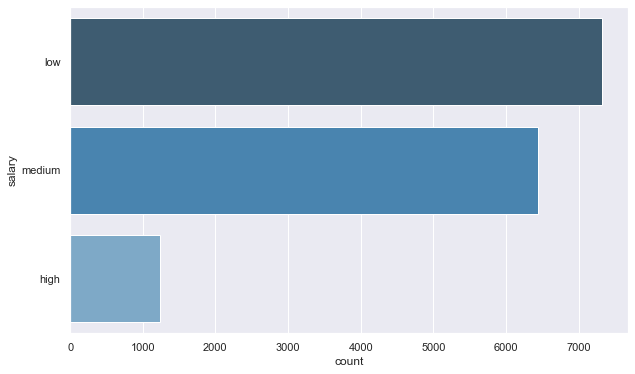

In [12]:
# Диаграмма распределения сотрудников по зарплатам по всей фирме
plt.figure(figsize=(10,6))
sns.set(style='darkgrid')
sns.countplot(y='salary', data=df, palette='Blues_d', order = df['salary'].value_counts().index)
plt.show()

## Задание 6
Показать распределение сотрудников по зарплатам в каждомдепартаменте по отдельности

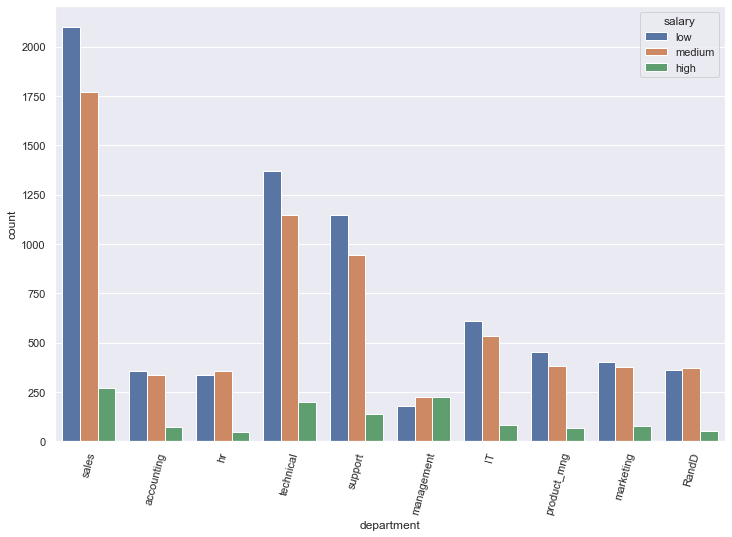

In [13]:
# Диаграмма распределения сотрудников по зарплатам по отделам
plt.figure(figsize=(12,8))
sns.countplot(x="department", hue="salary", data=df)
plt.xticks(rotation=75)
plt.show()

## Задание 7
Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

Нулевая гипотеза: сотрудники с высоким окладом проводят на работе столько же времени, что и сотрудники с низким окладом.

Альтернативная гипотеза: сотрудники с высоким и низким окладом проводят на работе разное количество времени.

alpha = 0.05 - общепринятое пороговое значение, равное 5%.

In [14]:
high = df[df['salary'] == 'high']['average_montly_hours']
low = df[df['salary'] == 'low']['average_montly_hours']
print(high.mean(), low.mean())
st.ttest_ind(high, low).pvalue

199.86742118027485 200.9965828321487


0.4661023478267259

Уже сравнение среднего времени, проведенного на работе сотрудниками с высоким и низким окладом показало, что сотрудники с высоким окладом в среднем проводят меньше времени, чем сотрудники с низким окладом. Но значима ли эта разница? Статистический тест показал, что вероятность получить такое или еще большее различие составляет 47%. Значит, мы не можем отвергнуть нулевую гипотезу.

# Задание 8
Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

In [15]:
# Количество уволившихся сотрудников
left_count = df[df['left'] == 1]['salary'].count()

# Количество уволившихся сотрудников с повышением
left_count_up = df[(df['left'] == 1) & (df['promotion_last_5years'] == 1)]['salary'].count()

# Доля уволившихся сотрудников с повышением
left_count_up / left_count

0.005320638476617194

In [16]:
# Средняя степень удовлетворенности среди уволившихся сотрудников
df[df['left'] == 1]['satisfaction_level'].mean()

0.44009801176140917

In [17]:
# Среднее количество проектов среди уволившихся сотрудников
df[df['left'] == 1]['number_project'].mean()

3.8555026603192384

In [18]:
# Количество работающих сотрудников
working_count = df[df['left'] == 0]['salary'].count()

# Количество работающих сотрудников с повышением
working_count_up = df[(df['left'] == 0) & (df['promotion_last_5years'] == 1)]['salary'].count()

# Доля работающих сотрудников с повышением
working_count_up / working_count

0.026251312565628283

In [19]:
# Средняя степень удовлетворенности среди работающих сотрудников
df[df['left'] == 0]['satisfaction_level'].mean()

0.666809590479516

In [20]:
# Среднее количество проектов среди работающих сотрудников
df[df['left'] == 0]['number_project'].mean()

3.786664333216661

## Задание 9
Разделить данные на тестовую и обучающую выборкиПостроить модель LDA, предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме department иsalary). Оценить качество модели на тестовой выборке.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [23]:
# Отделяем колонки с признаками от колонки с целевой переменной 
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 
        'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = df['left']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)

In [25]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

In [26]:
# обучаем данные
lda.fit(X_train, y_train)
lda.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [27]:
# оценка точности модели

from sklearn.metrics import accuracy_score

accuracy_score(y_test, lda.predict(X_test))

0.7668888888888888